In [ ]:
import pandas as pd
import numpy as np

df =  pd.read_csv('nutrition.csv')
df.head()
df = df.loc['1':]
df.fillna(0, inplace=True)
original = df.copy()
df = pd.get_dummies(df)
df.head()

,Calories,Calories from Fat,"Food and Serving_Apple, 1 large (242 g/8 oz)","Food and Serving_Asparagus, 5 spears (93 g/3.3 oz)","Food and Serving_Avocado, California,1/5 medium (30 g/1.1 oz)","Food and Serving_Banana, 1 medium (126 g/4.5 oz)","Food and Serving_Bell Pepper, 1 medium (148 g/5.3 oz)",Food and Serving_Blue Crab,"Food and Serving_Broccoli, 1 medium stalk (148 g/5.3 oz)","Food and Serving_Cantaloupe, 1/4 medium (134 g/4.8 oz)","Food and Serving_Carrot, 1 carrot, 7"" long, 1 1/4"" diameter (78 g/2.8 oz)",Food and Serving_Catfish,"Food and Serving_Cauliflower, 1/6 medium head (99 g/3.5 oz)","Food and Serving_Celery, 2 medium stalks (110 g/3.9 oz)","Food and Serving_Clams, about 12 small",Food and Serving_Cod,"Food and Serving_Cucumber, 1/3 medium (99 g/3.5 oz)",Food and Serving_Flounder/Sole,"Food and Serving_Grapefruit, 1/2 medium, (154 g/5.5 oz)","Food and Serving_Grapes, 3/4 cup (126 g/4.5 oz)","Food and Serving_Green (Snap) Beans, 3/4 cup cut (83 g/3.0 oz)","Food and Serving_Green Cabbage, 1/12 medium head (84 g/3.0 oz)","Food and Serving_Green Onion, 1/4 cup chopped (25 g/0.9 oz)",Food and Serving_Haddock,Food and Serving_Halibut,Food and Serving_Honeydew Melon 1/10 medium melon (134 g/4.8 oz),"Food and Serving_Iceberg Lettuce, 1/6 medium head (89 g/3.2 oz)","Food and Serving_Kiwifruit, 2 medium (148 g/5.3 oz)","Food and Serving_Leaf Lettuce, 1 1/2 cups shredded (85 g/3.0 oz)","Food and Serving_Lemon, 1 medium (58 g/2.1 oz)","Food and Serving_Lime, 1 medium (67 g/2.4 oz)",Food and Serving_Lobster,"Food and Serving_Mushrooms, 5 medium (84 g/3.0 oz)","Food and Serving_Nectarine, 1 medium (140 g/5.0 oz)",Food and Serving_Ocean Perch,"Food and Serving_Onion, 1 medium (148 g/5.3 oz)",Food and Serving_Orange Roughy,"Food and Serving_Orange, 1 medium (154 g/5.5 oz)","Food and Serving_Oysters, about 12 medium","Food and Serving_Peach, 1 medium (147 g/5.3 oz)",...,Saturated Fat_0,Saturated Fat_0.5,Saturated Fat_1,Saturated Fat_1.5,Saturated Fat_2,Saturated Fat 2_0,Saturated Fat 2_0,Saturated Fat 2_10,Saturated Fat 2_3,Saturated Fat 2_5,Saturated Fat 2_8,Chole-sterol 1_0,Chole-sterol 1_170,Chole-sterol 1_20,Chole-sterol 1_40,Chole-sterol 1_45,Chole-sterol 1_50,Chole-sterol 1_55,Chole-sterol 1_60,Chole-sterol 1_65,Chole-sterol 1_70,Chole-sterol 1_75,Chole-sterol 1_80,Chole-sterol 1_95,Chole-sterol 2_0,Chole-sterol 2_13,Chole-sterol 2_15,Chole-sterol 2_17,Chole-sterol 2_18,Chole-sterol 2_20,Chole-sterol 2_22,Chole-sterol 2_23,Chole-sterol 2_25,Chole-sterol 2_27,Chole-sterol 2_32,Chole-sterol 2_57,Chole-sterol 2_7,Food Type_Fruits Serving Size (gram weight/ounce weight),"Food Type_Seafood, Serving Size (84 g/3 oz)","Food Type_Vegetables, Serving Size (gram weight/ ounce weight)"
1,20.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,25.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,45.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,30.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,25.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
labels = np.array(df['Calories'])
df = df.drop('Calories', axis = 1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
features = np.array(df)

In [ ]:
from sklearn import preprocessing

df = pd.DataFrame(preprocessing.scale(df), columns = df.columns) 

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [ ]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('\nAccuracy:', round(accuracy, 2), '%.')


Accuracy: 75.77 %.


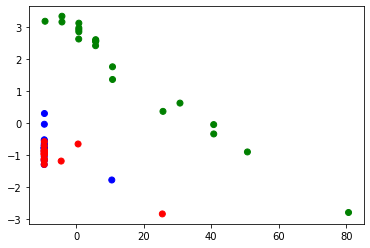

In [ ]:
from sklearn.decomposition import PCA

best_features = features.copy()

pca = PCA(n_components=2, svd_solver='full')
pca_result = pca.fit_transform(best_features)

food_type = list(original['Food Type'])
le = preprocessing.LabelEncoder()
food_type = le.fit_transform(food_type)

colors = []
for f in food_type:
  if f == 0:
    colors.append('red')
  elif f == 1:
    colors.append('green')
  elif f == 2:
    colors.append('blue')

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, marker="o", picker=True)

In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])